### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [88]:
# Code starts here

# Load train data
legos = pd.read_csv('train.csv')

# Explore data
print(legos.head())
print(legos.tail())
print(legos.describe())
print(legos.info())

# Merge ratings - Mean rating
legos['overall_rating'] = (legos['val_star_rating'] + legos['play_star_rating'] + legos['star_rating'])/3

# Code ends here.

   ages  list_price  num_reviews  piece_count  play_star_rating  \
0     8    155.8800          202         2469               4.7   
1    26     19.9900            9          252               4.8   
2    26     91.6980           56          659               4.6   
3    11     24.3878            1           19               3.0   
4     7    609.9878           84         4016               4.5   

   review_difficulty  star_rating  theme_name  val_star_rating  country  Id  
0                  1          4.9           9              4.7        7   0  
1                  0          4.6          39              4.6       20   1  
2                  0          4.6          34              3.9        4   2  
3                  5          4.0          13              4.0       10   3  
4                  1          3.9          34              3.5       10   4  
      ages  list_price  num_reviews  piece_count  play_star_rating  \
8577    29    152.4878           13          955           

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

[]

<Figure size 1080x720 with 0 Axes>

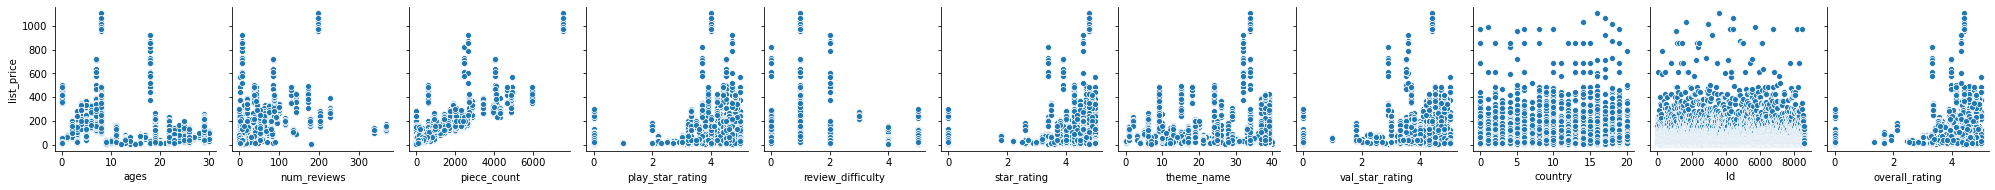

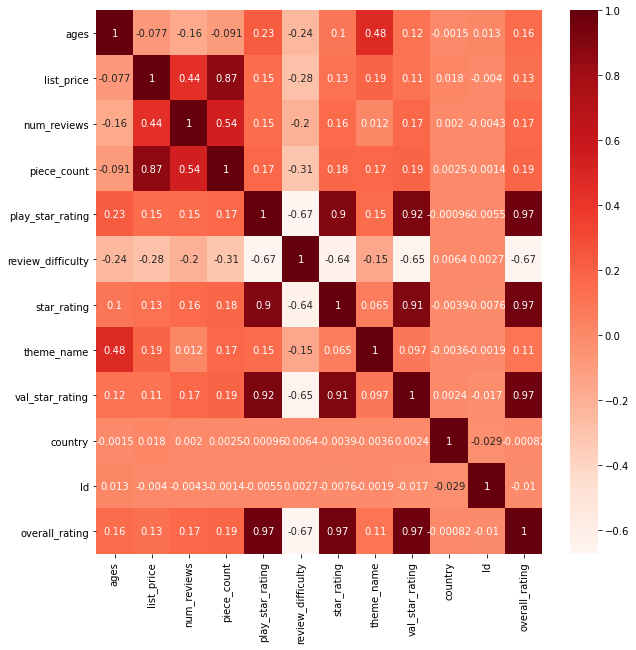

In [89]:
# Code starts here

# Feature relation with Target
plt.figure(figsize=(15,10))
sns.pairplot(data=legos,y_vars=['list_price'],x_vars=['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating','country','Id','overall_rating'])
plt.plot()

# Feature relation with Target
legos_corr = legos.corr()

plt.figure(figsize=(10,10))
sns.heatmap(legos_corr,annot=True,cmap=plt.cm.Reds)
plt.plot()

# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

[]

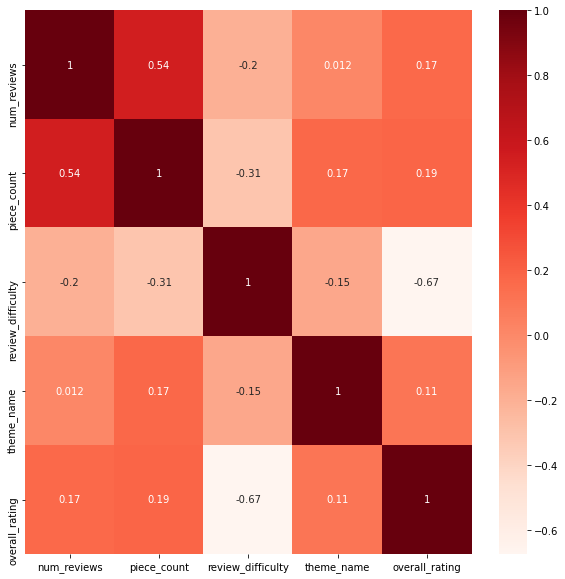

In [90]:
# Code starts here

# Separate features and target
X = legos[['num_reviews','piece_count','review_difficulty','theme_name','overall_rating']]
y= legos['list_price']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature corelation
plt.figure(figsize=(10,10))
feature_corr = legos[['num_reviews','piece_count','review_difficulty','theme_name','overall_rating']].corr()
sns.heatmap(feature_corr,annot=True,cmap=plt.cm.Reds)
plt.plot()

# Code ends here.

### Model building

In [91]:
# Code starts here

# Fit the train data
basemodel = LinearRegression()
basemodel.fit(X_train,y_train)

# Predict
y_pred = basemodel.predict(X_test)

# R-squared score
r2=r2_score(y_test, y_pred)
print('r2: ', round(r2,4))

# Code ends here.

r2:  0.7375


### Residual check!

- Check the distribution of the residual.

                   Coefficient
num_reviews          -0.057806
piece_count           0.095023
review_difficulty    -3.160187
theme_name            0.284771
overall_rating       -3.876214


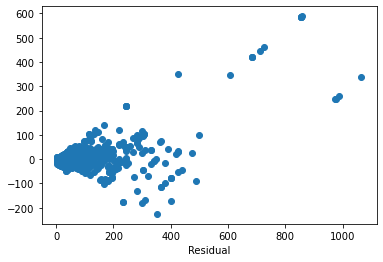

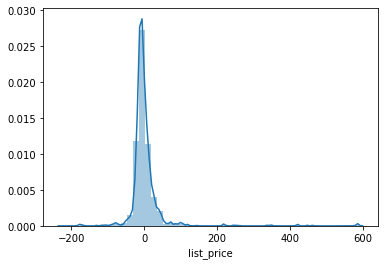

In [92]:
# Code starts here

# Residual
residual = y_test - y_pred

# Coefficients of regression
coeff_df = pd.DataFrame(basemodel.coef_.reshape(5,1), X.columns, columns=['Coefficient'])  
print(coeff_df)

# Actual Vs residual
plt.scatter(y_test,residual)
plt.xlabel("Residual")
plt.show()

# residual distribution
sns.distplot(residual)

# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [93]:
# Code starts here

#Load test data
test_data = pd.read_csv('test.csv')

# Store Is
results = pd.DataFrame(test_data['Id'])

# Derieve overall rating
test_data['overall_rating'] = (test_data['val_star_rating'] + test_data['play_star_rating'] + test_data['star_rating'])/3

# Separate features and target
test_data_features = test_data[['num_reviews','piece_count','review_difficulty','theme_name','overall_rating']]

# Predict
test_data_pred = basemodel.predict(test_data_features)

# Add to results
results['list_price'] = test_data_pred.tolist()

# Write to CSV
results.to_csv('results.csv',index=False)

# Code ends here.